The goal of this project is to **assess the feasibility** of automatically categorizing products based on their textual description. <br>

## Data, dependencies, basic info
------
Import dataset, import some basic libraries, set style for plotting and some basic inspection of the dataset at hand.

In [2]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
# Turn off warning messages 
import warnings
warnings.simplefilter("ignore", category=Warning)
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

In [4]:
# Define some style choices for plotting
plt.style.use('seaborn-dark')

viva_magenta = '#BE3455'
lavender='#c8b6ff'
agate_gray='#b0b0a9'
winery ='#7E212A'
independence='#4c516d'
classic_blue ='#0f4c81'
verdigris ='#43b3ae'
classic_green='#4A9E3C'
daylily ='#e9a900'


palettes = [viva_magenta,classic_green,lavender,verdigris,classic_blue,daylily,independence,agate_gray]

In [5]:
# Read dataframe
df_text = pd.read_csv("C:\\Users\\zheng\\Documents\\Openclassrooms\\Data Scientist\\Project_06\\Flipkart\\flipkart_com-ecommerce_sample_1050.csv")

In [6]:
# Inspect the 5 first rows
df_text.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [7]:
# Dataset size
df_text.shape

(1050, 15)

In [8]:
# Data types
df_text.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [9]:
# Inspecting missing values
df_text.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

The variables I will use for this project are uniq_id / product_name / product_category_tree / description. No missing values in these variables. Good.

## Preprocessing
-----
Lemmatization, stopwords removal and tokenization of variables *product_name* & *description*.

In [10]:
# Creat a subset of text variables.
corpus = df_text[['product_name','description']].copy()
corpus.head()

,product_name,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...


In [11]:
# Lemmatization package
import spacy
nlp =spacy.load("en_core_web_sm")

In [12]:
# Define a list of stop words, puncuations and special characters to remove
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english'))) + \
    ['[', ']', ',', '.', ':', '?',
        '(', ')', '-', ' ', '_', '*', '#', '\r\n', '\r', '\n']

In [13]:
# A function to lemmatize and remove stop words
def txt_cleanse(text):
    doc = nlp(text)
    
    # Obtain the lemmatized words
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    
    # Remove pre-defined stop words
    # Numbers are not removed since they could provide information (e.g. '30 day return')
    tokens = [token.lower() for token in tokens if token not in stop_words]
    
    # Put tokens back into string format
    return ' '.join(tokens)

In [14]:
# Apply clense function to variables product_name and description, generating 2 new columns
corpus['product_name'] = corpus['product_name'].apply(lambda txt : txt_cleanse(txt))
corpus['description'] = corpus['description'].apply(lambda txt : txt_cleanse(txt))

In [15]:
# Extract category labels for each product
# This will be used to measure model performance
categories=df_text['product_category_tree'].str.split(' >> ',expand=True)[0]
categories = categories.str.slice(start=2)
corpus['category'] = categories

In [16]:
corpus.head()

,product_name,description,category
0,elegance polyester multicolor abstract eyelet ...,key features elegance polyester multicolor abs...,Home Furnishing
1,sathiyas cotton bath towel,specification sathiyas cotton bath towel 3 bat...,Baby Care
2,eurospa cotton terry face towel set,key features eurospa cotton terry face towel s...,Baby Care
3,santosh royal fashion cotton printed king size...,key features santosh royal fashion cotton prin...,Home Furnishing
4,jaipur print cotton floral king size double be...,key features jaipur print cotton floral king s...,Home Furnishing


In [17]:
print("An example of clean product name: \n",corpus['product_name'][0])
print('-'*100)
print("An example of clean description: \n",corpus['description'][0])

An example of clean product name: 
 elegance polyester multicolor abstract eyelet door curtain
----------------------------------------------------------------------------------------------------
An example of clean description: 
 key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 price r 899 curtain enhance look interior curtain 100 high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant- wrinkle anti shrinkage elegant apparance home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart thing morning welcome bright sun ray want wish good morning world draw close evening create special moment joyous beauty give soothe print bring home elegant curtain softly filter light room right sunlight ,specification elegance polyester multicolor a

## EDA
---
Some exploratory analysis might help to give some intuation for modeling.

### Word count
The amount of words for product_name and description for each product.

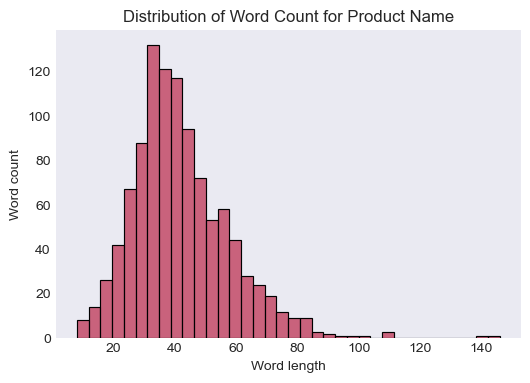

In [18]:
name_word_count = [len(name) for name in corpus['product_name']]

plt.figure(figsize=(6,4))
sns.histplot(name_word_count,color=viva_magenta)
plt.xlabel('Word length')
plt.ylabel('Word count')
plt.title('Distribution of Word Count for Product Name',fontsize=12)
plt.savefig('barplot_word_count_product_name',dpi=300,bbox_inches='tight')
plt.show()

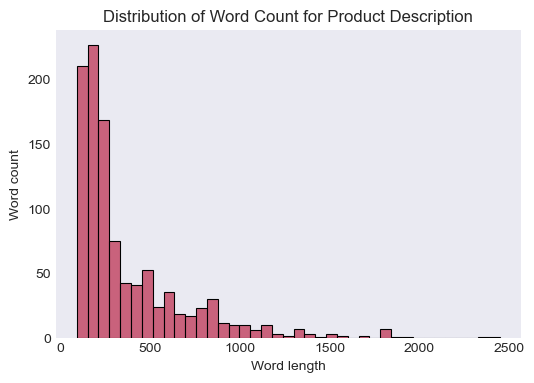

In [19]:
description_word_count = [len(description) for description in corpus['description']]

plt.figure(figsize=(6,4))
sns.histplot(description_word_count,color=viva_magenta)
plt.xlabel('Word length')
plt.ylabel('Word count')
plt.title('Distribution of Word Count for Product Description',fontsize=12)
plt.savefig('barplot_word_count_description',dpi=300,bbox_inches='tight')
plt.show()

The word count for product_name is quite normally distributed. It centres around 35.<br>
The word count for description is very much right skewed. The majority of descriptions are under 500 word count. 

### N-gram analysis
Let's inspect if bigrams and trigrams generate more meaningful insights.

In [20]:
# A function that generats n-grams
import nltk
from nltk.util import ngrams
def extract_ngrams(document, num):
    n_grams = ngrams(nltk.word_tokenize(document), num)
    return [ '_'.join(grams) for grams in n_grams]

In [21]:
# A function to count ngrams then plot the counting result in a barplot
from collections import Counter
def top_10_ngrams(variable, n, ngrams, ax):
    count = Counter()

    for document in corpus[variable]:
        for word in extract_ngrams(document, n):
            count[word] += 1

    df_count = pd.DataFrame(count.items(), columns=['word', 'count'])
    top_10 = df_count.sort_values(by='count', ascending=False).head(10)

    sns.barplot(data=top_10,
                x='word',
                y='count',
                color=verdigris,
                linewidth=0.7,
                edgecolor=independence,
                ax=ax)

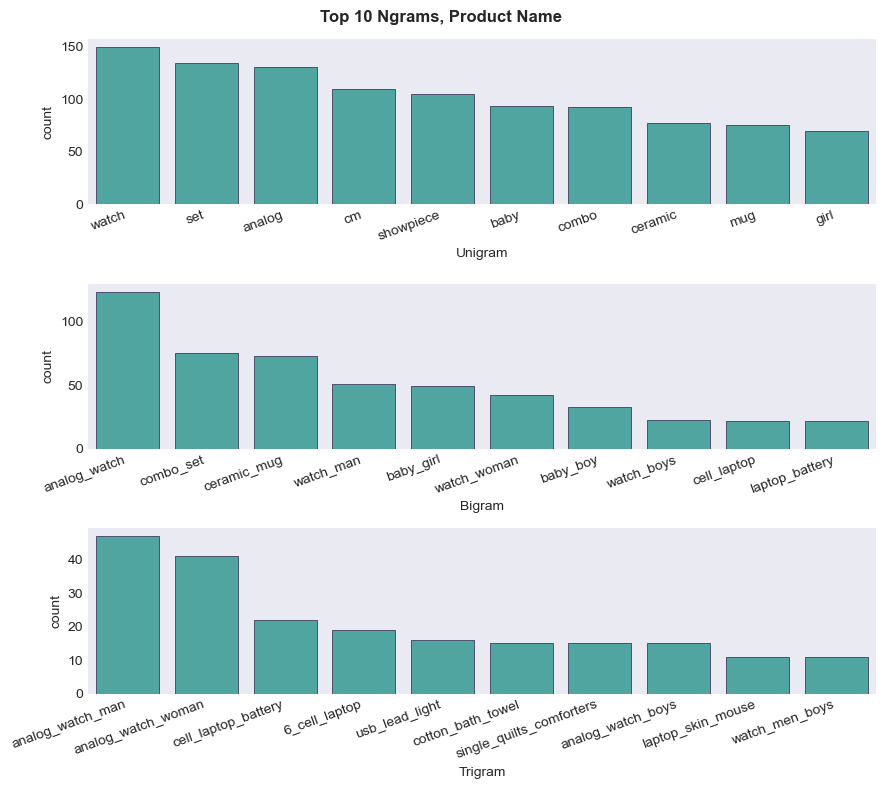

In [22]:
# Ngrams analysis product_name
fig, axes=plt.subplots(3,1,figsize=(9,8),sharex=False,sharey=False)

top_10_ngrams('product_name',1,'Unigram',axes[0])
axes[0].set_xlabel('Unigram')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=20, ha='right',size=10)

top_10_ngrams('product_name',2,'Bigram',axes[1])
axes[1].set_xlabel('Bigram')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=20, ha='right',size=10)

top_10_ngrams('product_name',3,'Trigram',axes[2])
axes[2].set_xlabel('Trigram')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=20, ha='right',size=10)

plt.suptitle('Top 10 Ngrams, Product Name',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.savefig('ngram_analysis_product_name',dpi=300,bbox_inches='tight')
plt.show()

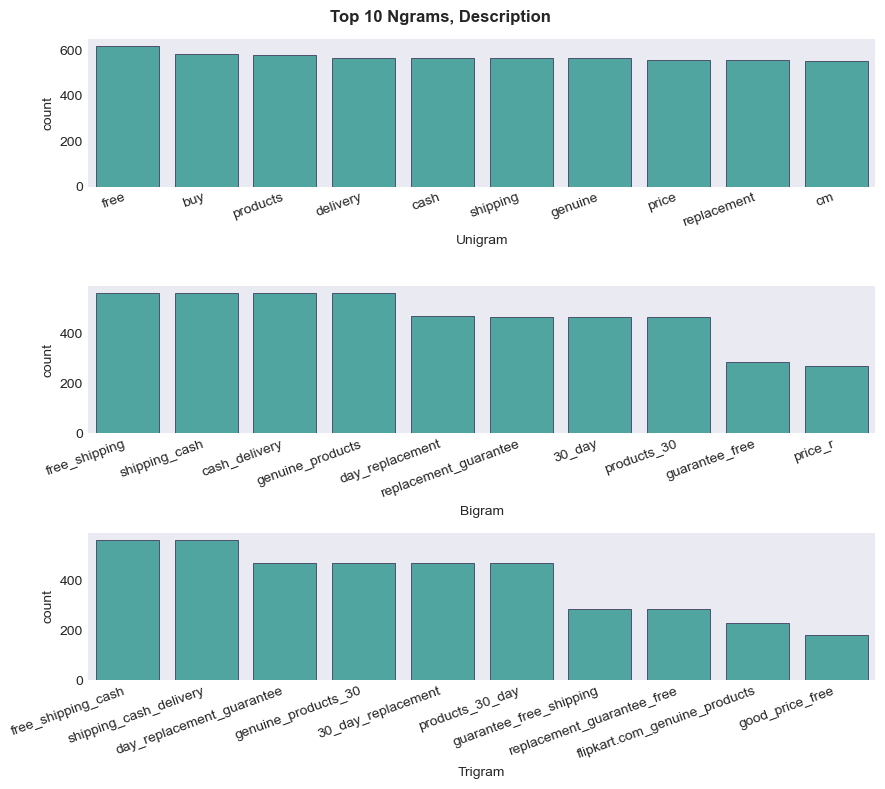

In [23]:
# Ngram analysis description
fig, axes=plt.subplots(3,1,figsize=(9,8),sharex=False,sharey=False)

top_10_ngrams('description',1,'Unigram',axes[0])
axes[0].set_xlabel('Unigram')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=20, ha='right',size=10)

top_10_ngrams('description',2,'Bigram',axes[1])
axes[1].set_xlabel('Bigram')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=20, ha='right',size=10)

top_10_ngrams('description',3,'Trigram',axes[2])
axes[2].set_xlabel('Trigram')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=20, ha='right',size=10)

plt.suptitle('Top 10 Ngrams, Description',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.savefig('ngram_analysis_description',dpi=300,bbox_inches='tight')
plt.show()

Looking at above plots, it appears that unigrams and bigrams provide meaningful tokens.<br>

In [24]:
# Add bigrams variables
corpus['product_name_bigram'] = corpus['product_name'].apply(lambda txt : extract_ngrams(txt,2))
corpus['description_bigram'] = corpus['description'].apply(lambda txt : extract_ngrams(txt,2))

corpus.head()

,product_name,description,category,product_name_bigram,description_bigram
0,elegance polyester multicolor abstract eyelet ...,key features elegance polyester multicolor abs...,Home Furnishing,"[elegance_polyester, polyester_multicolor, mul...","[key_features, features_elegance, elegance_pol..."
1,sathiyas cotton bath towel,specification sathiyas cotton bath towel 3 bat...,Baby Care,"[sathiyas_cotton, cotton_bath, bath_towel]","[specification_sathiyas, sathiyas_cotton, cott..."
2,eurospa cotton terry face towel set,key features eurospa cotton terry face towel s...,Baby Care,"[eurospa_cotton, cotton_terry, terry_face, fac...","[key_features, features_eurospa, eurospa_cotto..."
3,santosh royal fashion cotton printed king size...,key features santosh royal fashion cotton prin...,Home Furnishing,"[santosh_royal, royal_fashion, fashion_cotton,...","[key_features, features_santosh, santosh_royal..."
4,jaipur print cotton floral king size double be...,key features jaipur print cotton floral king s...,Home Furnishing,"[jaipur_print, print_cotton, cotton_floral, fl...","[key_features, features_jaipur, jaipur_print, ..."


## Feature extraction
To extract features from text for each product, I will try 4 techniques:
- Bag of words (count vectorizer, tf-idf)
- Word2Vec trained with given dataset
- Word2Vec with pretrained weights
- Bert transfer learning
- USE transfer learning

Each model will be tested on both variables *product_name* & *description*. <br>

The extracted features will then be clustered into 7 clusters (the number of categories). I will then compare cluster results with actual categories using ARI score. Higher the score, better the model performance.
Lastly I will analyse in details each result by a TSNE scatterplot and a heatmap.

### Functions

In [25]:
# Import and initiate tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42,init='pca',learning_rate='auto')

In [26]:
# Import and initiate KMeans
from sklearn.cluster import KMeans
n_categories=len(corpus['category'].unique())
kmeans = KMeans(n_clusters=n_categories, init='k-means++', random_state=42)

In [27]:
# A function to obtain the ARI score 
from sklearn.metrics import adjusted_rand_score

def get_ari(feature_matrix):
    clusters = kmeans.fit(feature_matrix).labels_
    ari = round(adjusted_rand_score(corpus['category'],clusters),4)
    return ari

In [28]:
# A funtcion to obtain TSNE representation of actual categories and clustered features side by side
# It also display the ARI score in the title
def get_visual(feature_matrix, model_name, labels, dataset):
    
    clusters = kmeans.fit(feature_matrix).labels_
    
    df_tsne = pd.DataFrame(tsne.fit_transform(feature_matrix))
    df_tsne.columns = ['TSNE1', 'TSNE2']
    df_tsne['category'] = labels
    df_tsne['kmeans_cluster'] = clusters

    colors=palettes[0:len(labels.unique())]
        
    ari = round(adjusted_rand_score(
        df_tsne['category'], df_tsne['kmeans_cluster']), 2)

    fig, axes = plt.subplots(1, 2, figsize=(12, 7))

    sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='category',
                    s=50, palette=colors, alpha=0.8, linewidth=0.5, edgecolor='white',
                    ax=axes[0])
    sns.move_legend(axes[0], "lower left",  bbox_to_anchor=(
        0, 1.03), ncol=2, title=None, frameon=True,)
    axes[0].set_title('Actual Categories', fontsize=12)

    sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='kmeans_cluster',
                    s=50, palette=colors, alpha=0.8, linewidth=0.5, edgecolor='white',
                    ax=axes[1])
    sns.move_legend(axes[1], "lower left",  bbox_to_anchor=(
        0, 1.03), ncol=4, title=None, frameon=True,)
    axes[1].set_title('Clusters by KMeans', fontsize=12)

    plt.suptitle(f"Model: {model_name}, Data: {dataset}, ARI Score:{ari}",
                 fontsize=12,
                 fontweight='bold')
    # Apart from the plot, a dataframe with categories and cluster labels is also returned
    # The dataframe will be used for heatmap analysis
    return fig, df_tsne 

In [29]:
# A function to generate a heatmap between actual categories and clusters labels
# The goal is to analyse which category(s) the model detects 
def get_heatmap(df):
    X=df.groupby(['category','kmeans_cluster']).apply(len).to_frame().reset_index()
    X.columns=['category','kmeans_cluster','count']
    X_pivot=pd.pivot_table(X,columns='kmeans_cluster',index='category',values='count').fillna(0)
    
    fig = sns.heatmap(X_pivot,cmap='coolwarm',alpha=0.5,annot=True,fmt='g')
    
    return fig

### Bag-of-words
-----
For the bag of words approach, I will test 2 methods: count vectorizer and tf-idf. <br> 

I will start by finding the combinations of the  following parameters which gives the best ARI score:
- ngram_range (*ngram*) 
- the variable used to fit the model (*var_to_fit*)
- the variable used to transform the model (*var_to_transform*)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from itertools import product

In [31]:
# A function to generate features given different models and fit/transform variable
def get_feature_matrix(var_to_fit, var_to_transform, model):
    X_fit = model.fit(corpus[var_to_fit])
    X_transform = model.transform(corpus[var_to_transform])
    features = X_fit.get_feature_names_out()
    feature_matrix=pd.DataFrame(X_transform.todense())
    return feature_matrix

In [32]:
# Define parameter candidates
var = ['product_name', 'description']

ngrams = [(1,1),(1, 2)]

results = {'ngram': [],
           'model': [],
           'var_to_fit': [],
           'var_to_transform': [],
           'ari': []
           }

In [33]:
# Loop through each combination of parameters for model CountVectorizer
for var_to_fit, var_to_transform, ngram in product(var, var, ngrams):
    model = CountVectorizer(max_features=8000, ngram_range=ngram, lowercase=False,
                            stop_words='english', max_df=0.9, min_df=1)
    features = get_feature_matrix(var_to_fit=var_to_fit,
                               var_to_transform=var_to_transform,
                               model=model)
    
    results['model'].append('count_vectorizer')
    results['ngram'].append(ngram)
    results['var_to_fit'].append(var_to_fit)
    results['var_to_transform'].append(var_to_transform)
    results['ari'].append(get_ari(feature_matrix=features))

In [34]:
# Loop through each combination of parameters for model Tf-idf
for var_to_fit, var_to_transform, ngram in product(var, var, ngrams):
    model = TfidfVectorizer(max_features=8000, ngram_range=ngram,
                            lowercase=False, stop_words='english',
                            max_df=0.9, min_df=1)
    features = get_feature_matrix(var_to_fit=var_to_fit,
                               var_to_transform=var_to_transform,
                               model=model)
    
    results['model'].append('tf_idf')
    results['ngram'].append(ngram)
    results['var_to_fit'].append(var_to_fit)
    results['var_to_transform'].append(var_to_transform)
    results['ari'].append(get_ari(feature_matrix=features))

In [35]:
#Look for best parameters
results= pd.DataFrame(results).sort_values(by='ari',ascending=False)
results.head()

,ngram,model,var_to_fit,var_to_transform,ari
12,"(1, 1)",tf_idf,description,product_name,0.3346
8,"(1, 1)",tf_idf,product_name,product_name,0.3109
14,"(1, 1)",tf_idf,description,description,0.2733
11,"(1, 2)",tf_idf,product_name,description,0.2699
10,"(1, 1)",tf_idf,product_name,description,0.2412


Time to run model: 0.11 seconds


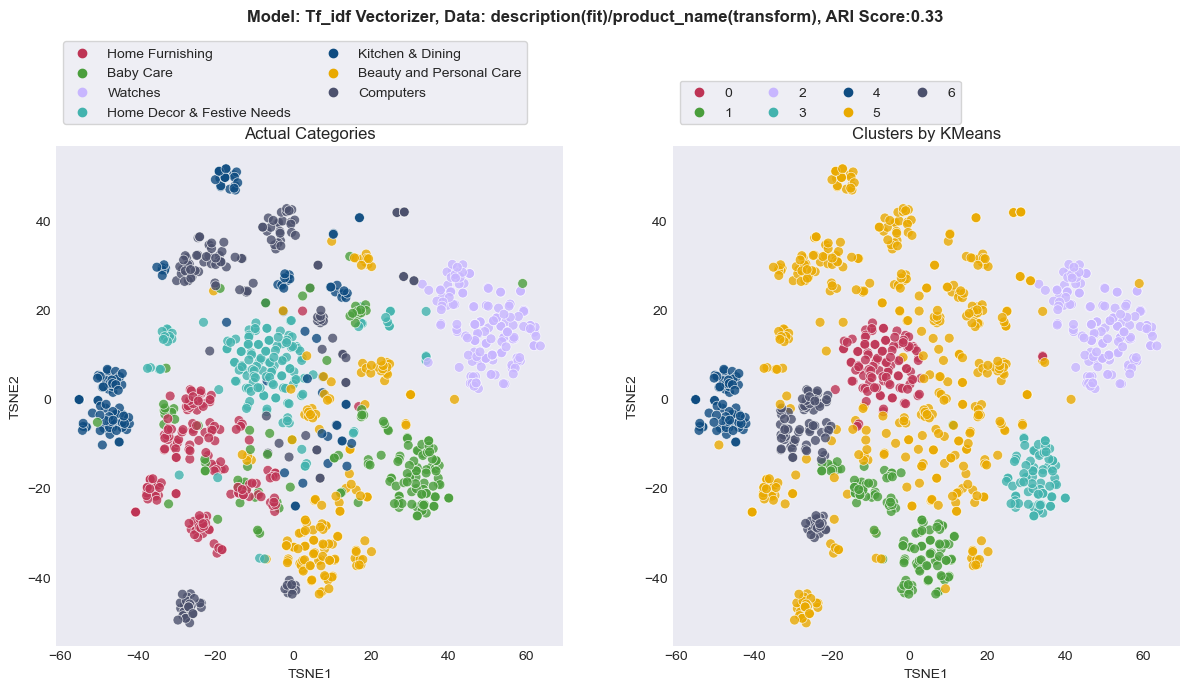

In [36]:
# Using parameters that gave the best result:
time_start = time.time()
model = TfidfVectorizer(max_features=8000, ngram_range=(1, 1),
                        lowercase=False, stop_words='english',
                        max_df=0.9, min_df=1)

features_tfidf = get_feature_matrix(var_to_fit='description',
                                    var_to_transform='product_name',
                                    model=model)
time_end = time.time()

print(f"Time to run model: {np.round(time_end-time_start,2)} seconds")

fig, df_tsne_tf_idf =get_visual(feature_matrix=features_tfidf,
           model_name='Tf_idf Vectorizer',
           labels=corpus['category'],
           dataset="description(fit)/product_name(transform)")
plt.tight_layout()
plt.savefig('tf_idf_product_name.png',dpi=300,bbox_inches='tight')
plt.show()

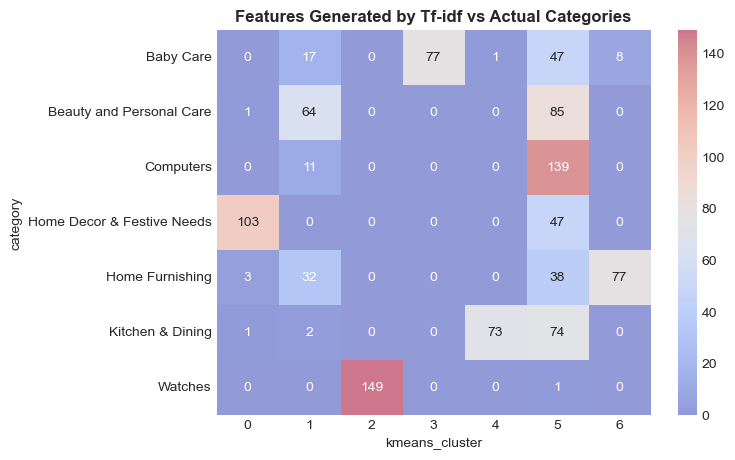

In [37]:
plt.figure(figsize=(7,5))
get_heatmap(df_tsne_tf_idf)
plt.title('Features Generated by Tf-idf vs Actual Categories', fontsize=12,fontweight='semibold')
plt.savefig('heatmap_tf-idf.png', dpi=300, bbox_inches='tight')
plt.show()

We can observe from above heatmap that features generated by Tf-idf model captured particularly well the categories *watches* / *home decor*. <br>
The model is indecisive on the other categories.

### Word2Vec
-----
This is an attempt with Gensim Word2Vec model trained on the given dataset.

In [38]:
from gensim.models import Word2Vec
import gensim

In [39]:
# A function to extract feature vectors
def vectorize(corpus, model):
    features = []

    for document in corpus:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in document:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return pd.DataFrame(features)

The Gensim Word2Vec model has many parameters. Finding the combination that produce the best result is important. <br>

In [40]:
# Transform input corpus into format that works with the Gensim Word2Vec model
product_name = corpus['product_name'].to_list()
product_name = [gensim.utils.simple_preprocess(text) for text in product_name]

product_name_bigram = corpus['product_name_bigram'].to_list()
product_name_bigram = [gensim.utils.simple_preprocess(text) for text in product_name_bigram]


description = corpus['description'].to_list()
description = [gensim.utils.simple_preprocess(text) for text in description]

description_bigram = corpus['description_bigram'].to_list()
description_bigram = [gensim.utils.simple_preprocess(text) for text in description_bigram]

In [42]:
# A function that finds the best parameters for a given corpus
def get_best_param(corpus, nom_corpus):
    windows = [2, 6]
    samples = np.logspace(-5, 0.1, 5)
    vector_sizes = [100, 300]
    epochs = [20, 80]
    alphas = [0.01, 0.1]

    params = {'corpus': [],
              'window': [],
              'sample': [],
              'vector_size': [],
              'epochs': [],
              'alpha': [],
              'ari': []
              }
    for window, sample, size, epoch, alpha, in product(windows, samples, vector_sizes, epochs, alphas):
        model = Word2Vec(sentences=corpus,
                         min_count=10,
                         window=window,
                         sample=sample,
                         epochs=epoch,
                         alpha=alpha,
                         vector_size=size,
                         workers=5,
                         seed=42)
        feature_vector = vectorize(corpus, model=model)
        ari = get_ari(feature_vector)
        params['corpus'].append(nom_corpus)
        params['window'].append(window)
        params['sample'].append(sample)
        params['vector_size'].append(size)
        params['epochs'].append(epoch)
        params['alpha'].append(alpha)
        params['ari'].append(ari)
    X = pd.DataFrame(params).sort_values(by='ari', ascending=False)
    return X.head(1)

In [43]:
# Identify best parameters for variables product_name / product_name_bigram / description /description_bigram
best_params=pd.DataFrame(get_best_param(corpus=product_name,nom_corpus='product_name'))
best_params=pd.concat([best_params,get_best_param(corpus=product_name_bigram,nom_corpus='product_name_bigram')],axis=0)
best_params=pd.concat([best_params,get_best_param(corpus=description,nom_corpus='description')],axis=0)
best_params=pd.concat([best_params,get_best_param(corpus=description_bigram,nom_corpus='description_bigram')],axis=0)

best_params

,corpus,window,sample,vector_size,epochs,alpha,ari
35,product_name,2,1.258925,100,80,0.10,0.5018
36,product_name_bigram,2,1.258925,300,20,0.01,0.2290
59,description,6,0.003548,100,80,0.10,0.3075
73,description_bigram,6,1.258925,100,20,0.10,0.2974


Interestingly, bigrams do not generate better results.

Time to run model: 1.09 seconds


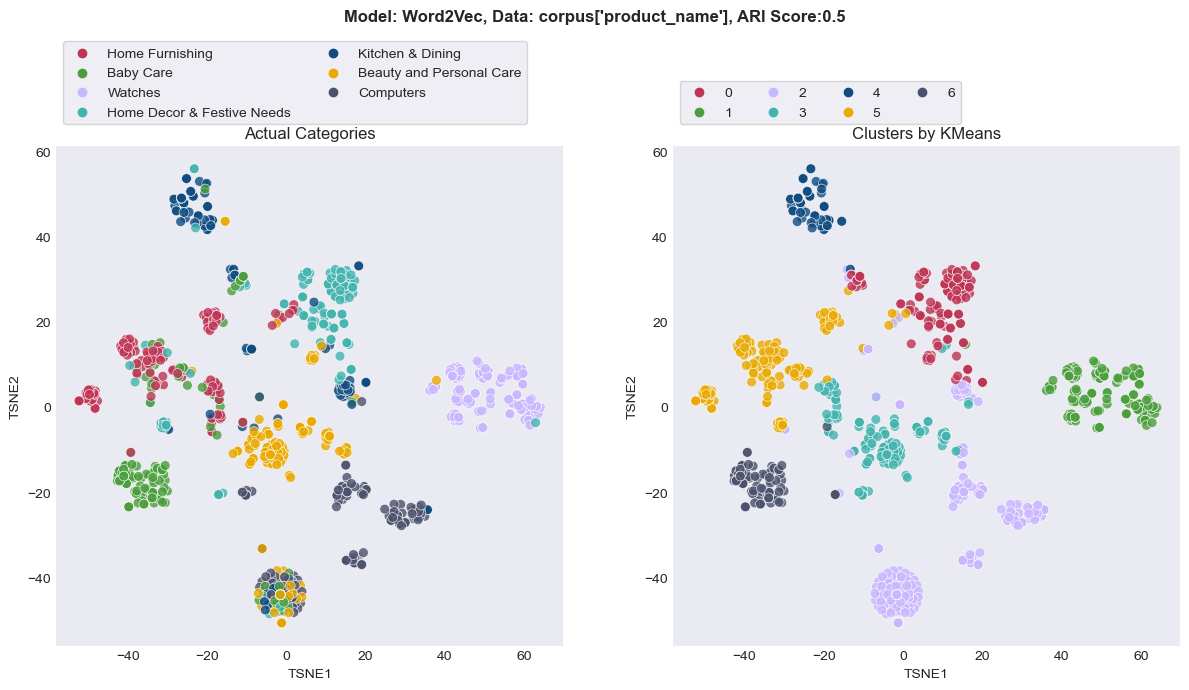

In [44]:
# Establish model and get TSNE visual
time_start=time.time()

model_w2v = Word2Vec(sentences=product_name,
                     min_count=10,
                     window=best_params['window'].head(1).values[0],
                     sample=best_params['sample'].head(1).values[0],
                     epochs=best_params['epochs'].head(1).values[0],
                     alpha=best_params['alpha'].head(1).values[0],
                     vector_size=best_params['vector_size'].head(1).values[0],
                     workers=5,
                     seed=42)
time_end=time.time()

features_w2v=vectorize(product_name, model=model_w2v)

print(f"Time to run model: {np.round(time_end-time_start,2)} seconds")

fig,df_tsne_w2v=get_visual(feature_matrix=features_w2v,
           model_name='Word2Vec',
           labels=corpus['category'],
           dataset="corpus['product_name']")

plt.tight_layout()
plt.savefig('w2v_product_name.png',dpi=300,bbox_inches='tight')
plt.show()

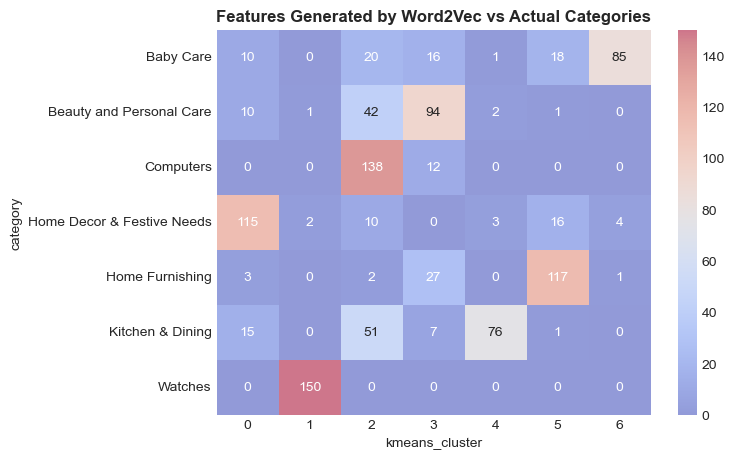

In [45]:
# Cluster analysis heatmap
plt.figure(figsize=(7,5))
get_heatmap(df_tsne_w2v)
plt.title('Features Generated by Word2Vec vs Actual Categories', fontsize=12,fontweight='semibold')
plt.savefig('heatmap_w2v.png',dpi=300, bbox_inches='tight')
plt.show()

Features extracted by the Word2Vec model performed well on categories *computers* / *home decor* / *home furnishing* / *watches*.

The Word2Vec model provides relatively acceptable ARI score, while taking not a lot of time to train. However, when applied to industrial scale dataset, the training time might increase significantly since the dataset is likely to contain more than 1050 products.

### Word2Vec with pre-trained model
----
I am using the golve-twitter-25 model since it's small and fast to load, on my computer. Further more, a bigger model was tried, and the additional time & computation cost did not generate a much better result.

In [46]:
import gensim.downloader as api

time_start = time.time()
model_w2v_pre_trained = api.load('glove-twitter-200')
time_end = time.time()

print(f"Time to load pre-trained model: {np.round(time_end-time_start,2)} second")

Time to load pre-trained model: 253.64 second


In [47]:
# A function that extracts feature vectors
# Code found here: https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/
def embedding_matrix(corpus):
    features = []

    for document in corpus:
        zero_vector = np.zeros(model_w2v_pre_trained.vector_size)
        vectors = []
        for token in document:
            if token in model_w2v_pre_trained:
                try:
                    vectors.append(model_w2v_pre_trained[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return pd.DataFrame(features)

In [48]:
time_start = time.time()
features_w2v_pretrain_product_name = embedding_matrix(description)
time_end = time.time()

print(f"Time to extract features: {np.round(time_end-time_start,2)} second")
print("ARI socre for variable description: ", get_ari(features_w2v_pretrain_product_name)

Time to extract features: 0.36 second


0.3181

In [49]:
time_start = time.time()
features_w2v_pretrain_description = embedding_matrix(product_name)
time_end = time.time()

print(f"Time to extract features: {np.round(time_end-time_start,2)} second")
print("ARI socre for variable product_name: ",get_ari(features_w2v_pretrain_description))

Time to extract features: 0.17 second


0.5063

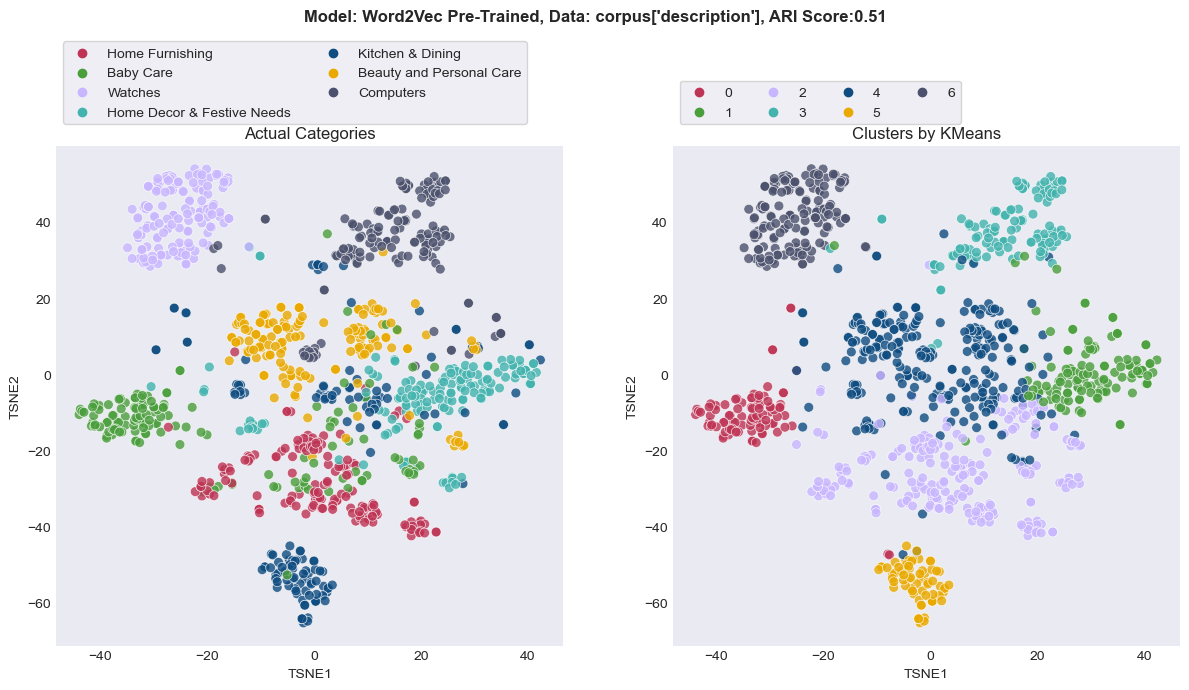

In [50]:
fig, df_tsne_w2v_pretrain=get_visual(feature_matrix=features_w2v_pretrain_description,
           model_name='Word2Vec Pre-Trained',
           labels=corpus['category'],
           dataset="corpus['description']")

plt.tight_layout()
plt.savefig('w2v_pretrain_description.png',dpi=300,bbox_inches='tight')
plt.show()

While using pretrained Word2Vec models increase significantly runtime, it does not improve result.

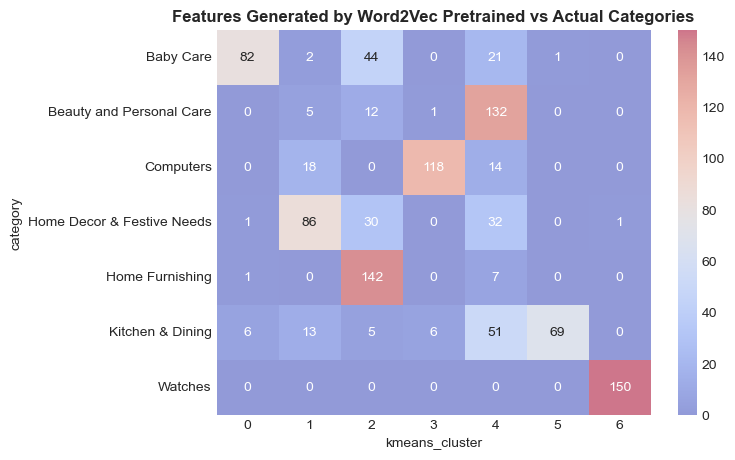

In [51]:
plt.figure(figsize=(7,5))
get_heatmap(df_tsne_w2v_pretrain)
plt.title('Features Generated by Word2Vec Pretrained vs Actual Categories', fontsize=12,fontweight='semibold')
plt.savefig('heatmap_w2v_pretrain.png',dpi=300, bbox_inches='tight')
plt.show()

Features extracted by the Word2Vec model performed well on categories *beauty* / *computer* / *home furnishing* / *watches*.

### Transformer model 
----
Implementinga transformer model, the Bert Hugginface, fine tuned to this task.<br>


![alt text](huggingface_logo-noborder.svg "Title")

Below are codes copied from example notebook from analysis on Tweets, provided by Openclassrooms.

In [52]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers

from transformers import *

In [53]:
os.environ["TF_KERAS"]='1'

In [54]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [55]:
from transformers import TFAutoModel
max_length = 50
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences_product_name = corpus['product_name'].to_list()

loading configuration file config.json from cache at C:\Users\zheng/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at C:\Users\zheng/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb42

In [56]:
start_time=time.time()
features_bert_product_name, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences_product_name, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\zheng/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\zheng/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.t

1/1 [==============================] - 1s 855ms/step
temps traitement :  121.0
Time taken to extract features:  121.97210311889648


In [57]:
max_length = 50
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences_description = corpus['description'].to_list()

loading configuration file config.json from cache at C:\Users\zheng/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at C:\Users\zheng/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb42

In [58]:
start_time=time.time()
features_bert_description, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences_description, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\zheng/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\zheng/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.t

1/1 [==============================] - 1s 814ms/step
temps traitement :  123.0
Time taken to extract features:  123.3244936466217


In [59]:
print('ARI score on features extracted with product_name: ', get_ari(features_bert_product_name))
print('ARI score on features extracted with description: ', get_ari(features_bert_description))

ARI score on features extracted with product_name:  0.4417
ARI score on features extracted with description:  0.2503


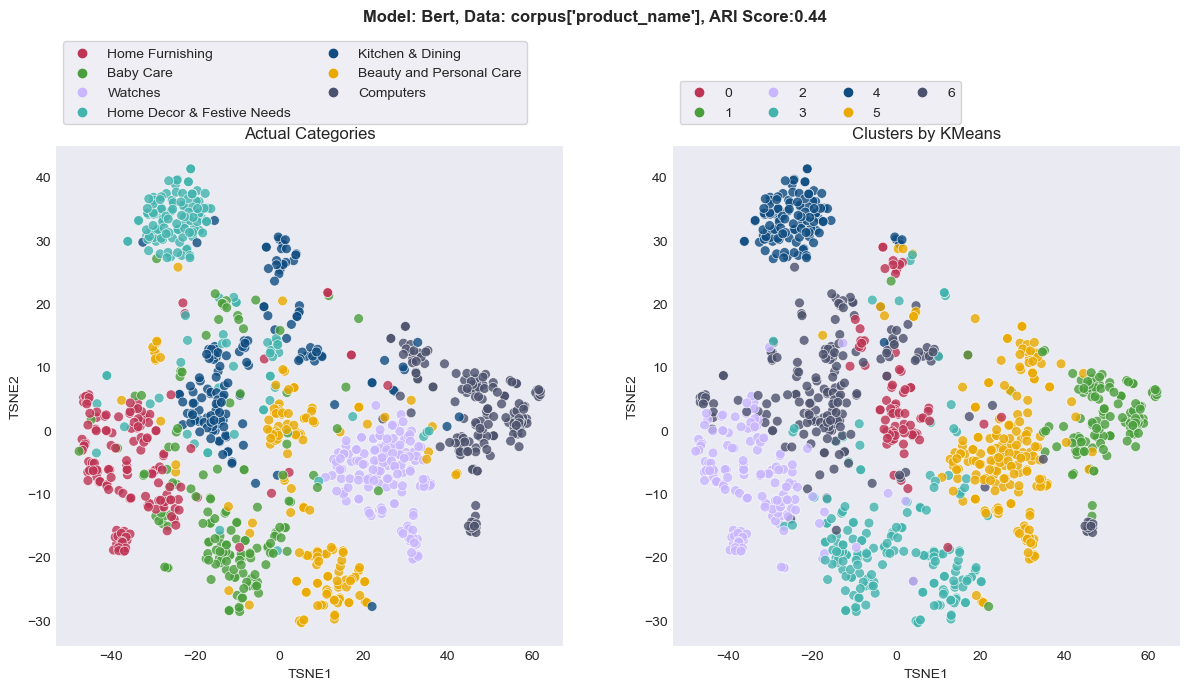

In [60]:
fig,df_tsne_bert =get_visual(feature_matrix=features_bert_product_name,
           model_name='Bert',
           labels=corpus['category'],
           dataset="corpus['product_name']")

plt.tight_layout()
plt.savefig('bert_product_name.png',dpi=300,bbox_inches='tight')
plt.show()

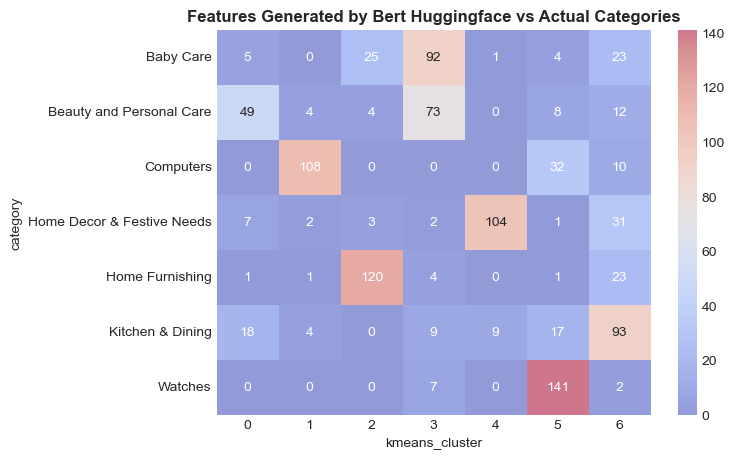

In [61]:
plt.figure(figsize=(7,5))
get_heatmap(df_tsne_bert)
plt.title('Features Generated by Bert Huggingface vs Actual Categories', fontsize=12,fontweight='semibold')
plt.savefig('heatmap_bert.png', dpi=300, bbox_inches='tight')
plt.show()

Features extracted by the Word2Vec model performed well on all categories except for *Beauty and Personal Care*.

### USE 
Lastly I will use Google's Universal Sentence Embedding model. This is also a transfer learning type model. The model produces a vector of 512 dimensions for each document.

In [62]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

os.environ["TF_KERAS"]='1'

In [63]:
model = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.KerasLayer(model)

In [64]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [65]:
batch_size = 10

sentences_product_name = corpus['product_name'].to_list()
sentences_description = corpus['description'].to_list()

start_time = time.time()
features_USE_product_name = feature_USE_fct(sentences_product_name, batch_size)
print('Time taken to extract features with product name: ', round(time.time()-start_time,2))
features_USE_description = feature_USE_fct(sentences_description, batch_size)
print('Time taken to extract features with description: ', round(time.time()-start_time,2))

print('ARI score on features extracted with product_name: ', get_ari(features_USE_product_name))
print('ARI score on features extracted with description: ', get_ari(features_USE_description))

Time taken to extract features with product name:  2.26
Time taken to extract features with description:  3.57
ARI score on features extracted with product_name:  0.5359
ARI score on features extracted with description:  0.267


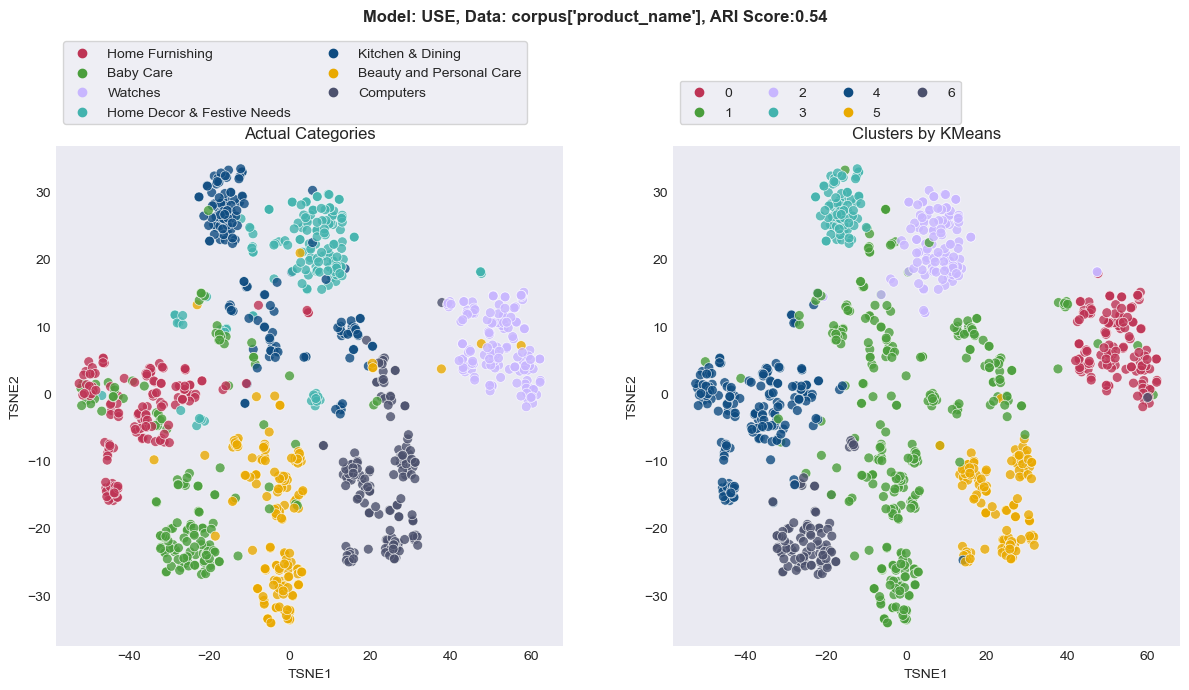

In [66]:
fig, df_tsne_USE=get_visual(feature_matrix=features_USE_product_name,
           model_name='USE',
           labels=corpus['category'],
           dataset="corpus['product_name']")
plt.tight_layout()
plt.savefig('USE_product_name.png',dpi=300,bbox_inches='tight')
plt.show()

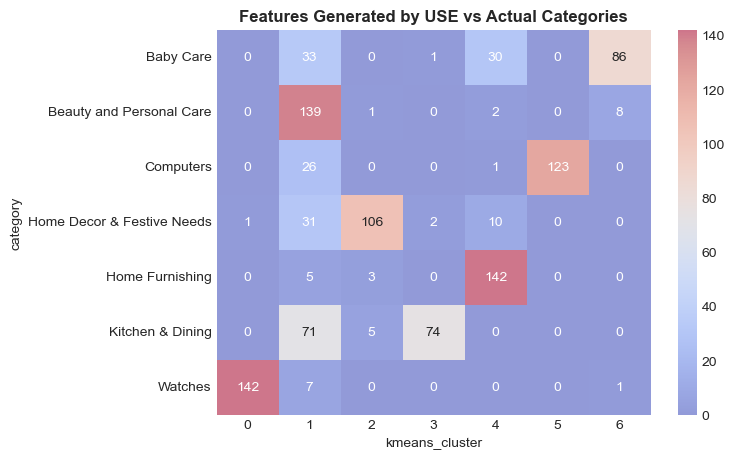

In [67]:
plt.figure(figsize=(7,5))
get_heatmap(df_tsne_USE)
plt.title('Features Generated by USE vs Actual Categories', fontsize=12,fontweight='semibold')
plt.savefig('heatmap_USE.png',dpi=300, bbox_inches='tight')
plt.show()

Features extracted by the Word2Vec model performed well on all categories except for *baby care* / *kitchen & dining*.

### Ensemble models
----
Combining the features from different models that best captured each category, and perform clustering on the newly formed features. 

In [68]:
from sklearn.decomposition import PCA
X = np.concatenate([
    features_w2v_pretrain_description.to_numpy(),
    features_bert_product_name,
    features_USE_product_name,
    features_USE_description
],
    axis=1)


X_pca = PCA(n_components=0.99, random_state=42).fit_transform(X)

print('ARI score for combined result features: ', get_ari(X_pca))

ARI score for combined result features:  0.5708


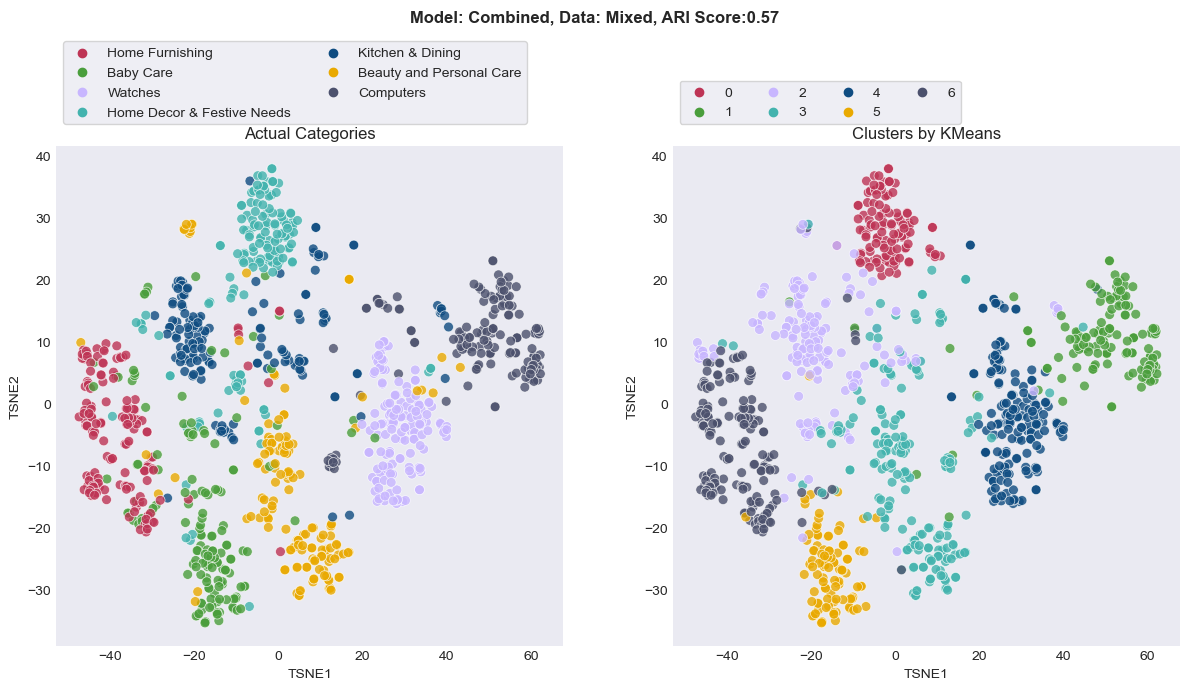

In [69]:
fig, df_tsne_combined=get_visual(feature_matrix=X_pca,
           model_name='Combined',
           labels=corpus['category'],
           dataset='Mixed')

plt.tight_layout()
plt.savefig('ensemble_model.png',dpi=300,bbox_inches='tight')
plt.show()

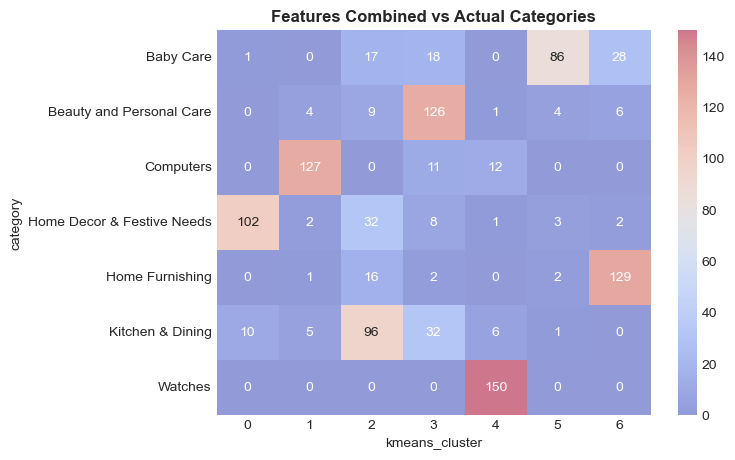

In [70]:
plt.figure(figsize=(7,5))
get_heatmap(df_tsne_combined)
plt.title('Features Combined vs Actual Categories', fontsize=12,fontweight='semibold')
plt.savefig('heatmap_combined.png', dpi=300, bbox_inches='tight')
plt.show()

By combining features generated by different models, the performence is boosted slightly.

The end.<br>
Thank you.